<a href="https://colab.research.google.com/github/Likelipop/See_image_processing/blob/main/Lab_02/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
%cd "/content"
%rm -rf See_image_processing/

/content


In [34]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

import os
import gdown

In [35]:
!git clone "https://github.com/Likelipop/See_image_processing.git"


Cloning into 'See_image_processing'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 37 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 5.38 MiB | 17.36 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [36]:
%cd "/content/See_image_processing/Lab_02"

/content/See_image_processing/Lab_02


In [37]:
img_bliss_path = 'Images/bliss.jpg'

# what is "BINS", and it's role

Now we have an idea on what is histogram, we can look into how to find this. Both OpenCV and Numpy come with in-built function for this. Before using those functions, we need to understand some terminologies related with histograms.

- **BINS**: The above histogram shows the number of pixels for every pixel value, i.e. from 0 to 255. i.e., you need 256 values to show the above histogram. But consider, what if you need not find the number of pixels for all pixel values separately, but number of pixels in an interval of pixel values? Say for example, you need to find the number of pixels lying between 0 to 15, then 16 to 31, ..., 240 to 255. You will need only 16 values to represent the histogram. So to speak, the number of BINS show us whether the histogram are **smother** or more **discrete** in the given interested range.

-**Why do we need to divide the histogram into "BINS"**: As mention above, The number of bins determines the level of detail in the histogram. More bins mean finer detail (smother histogram) (smaller intervals, with more bins showing subtle differences), while fewer bins provide a broader summary (discrete histogram).
WHen we only interested in a certain range of intensity, we can highlight different characteristics of an image just by adjusting the number of bins for specific tasks like image segmentation, thresholding, or color matching. For example, using fewer bins can help reduce noise and highlight dominant colors.




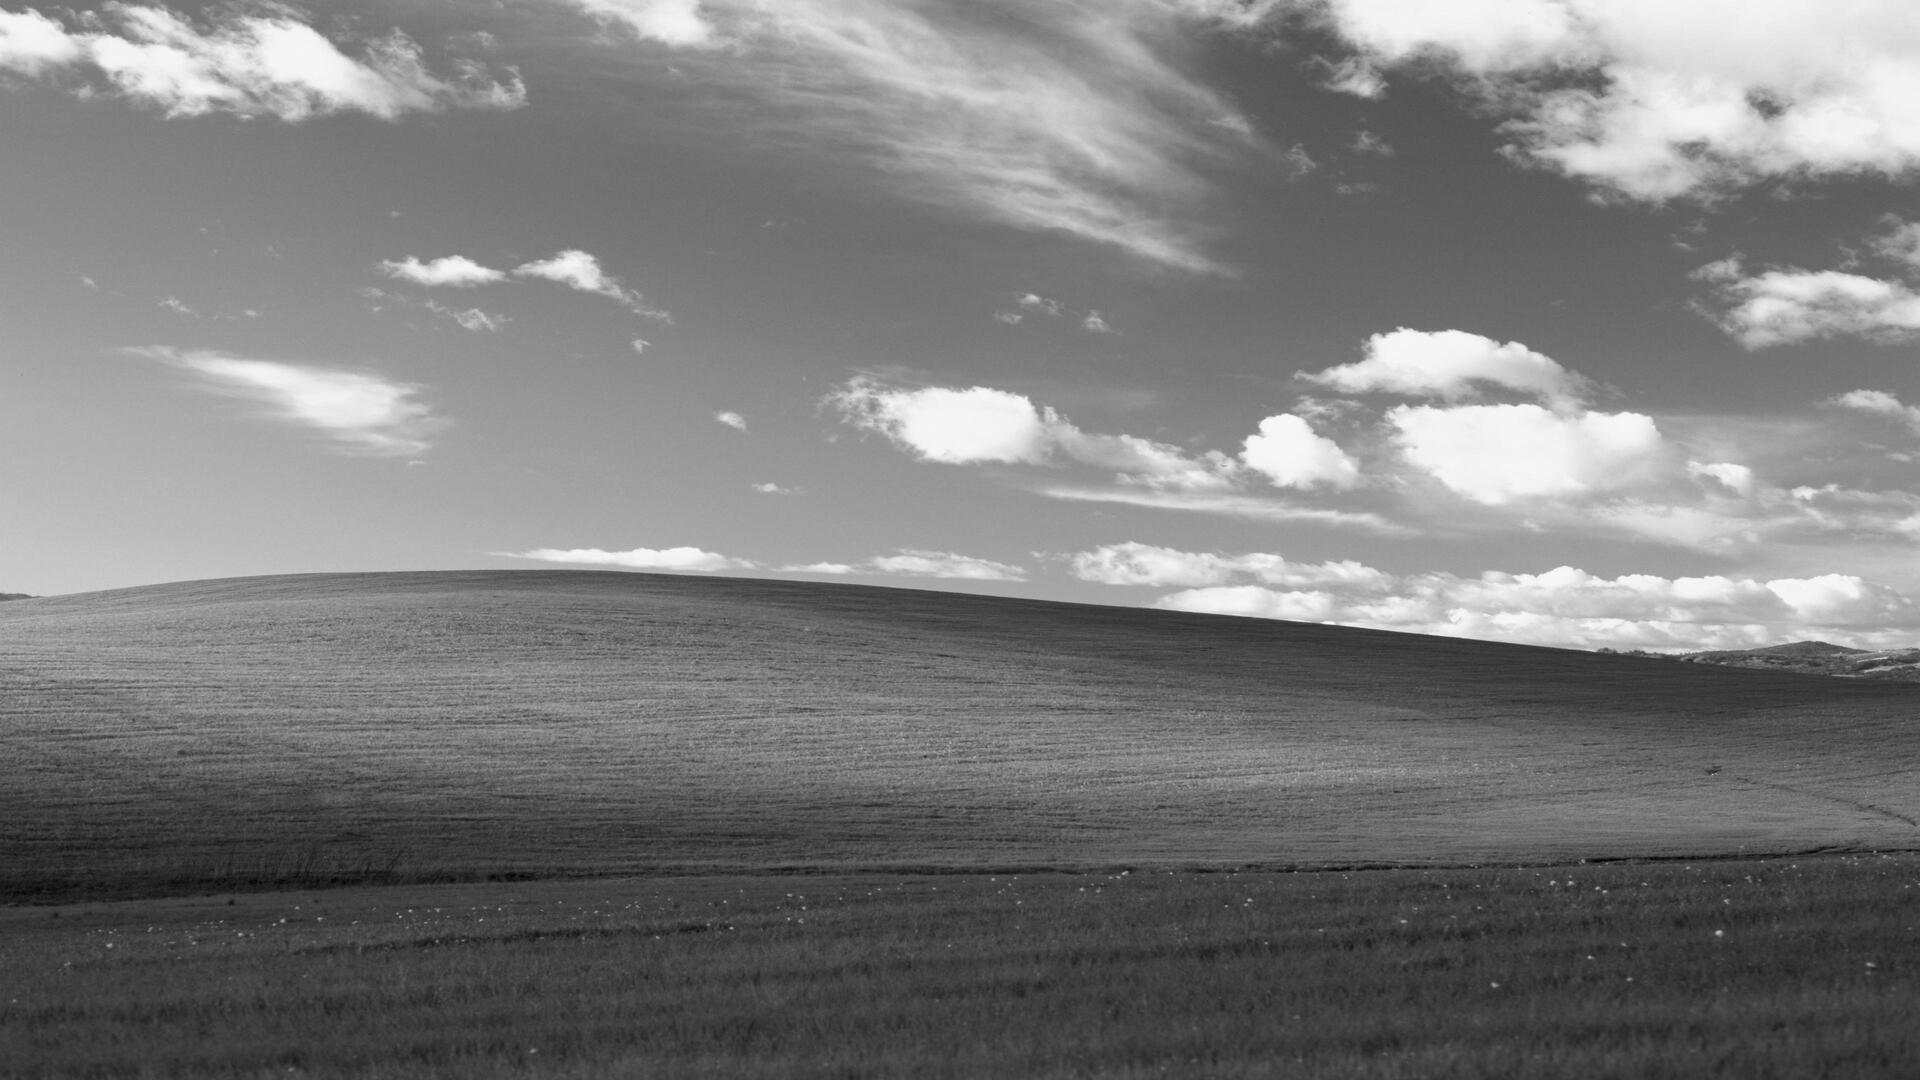

In [38]:
from google.colab.patches import cv2_imshow

# Check if the file exists before reading
assert os.path.exists(img_bliss_path), f"File Bliss.jpg does not exist"

# Read KarlMax image in grayscale
img_bliss = cv.imread(img_bliss_path, cv.IMREAD_GRAYSCALE)


cv2_imshow(img_bliss)
# Calculate the histogram of the image
hist = cv.calcHist([img_bliss], [0], None, [256], [0, 255])

hist is a 256x1 array, each value corresponds to number of pixels in that image with its corresponding pixel value.

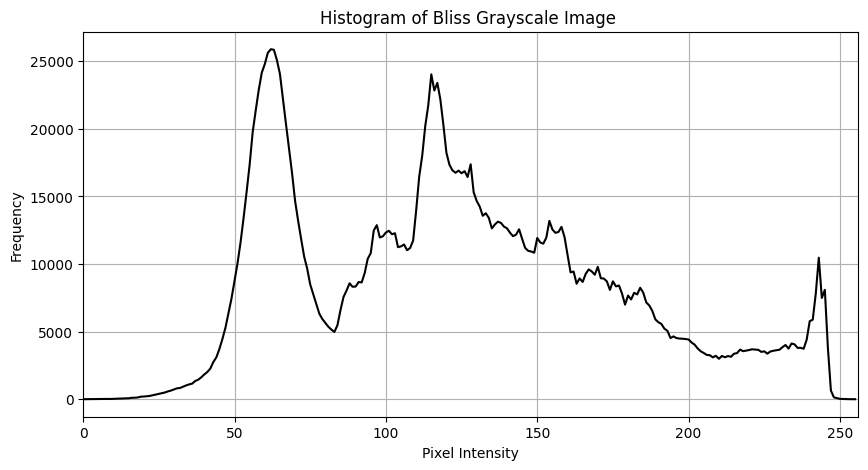

In [39]:
# Plot the histogram
plt.figure(figsize=(10, 5))
plt.plot(hist, color='black')
plt.title('Histogram of Bliss Grayscale Image ')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.grid()
plt.show()

## 2. Histogram Calculation in Numpy

Numpy also provides you a function, `np.histogram()`. So instead of `calcHist()` function, you can try the line below:

```python
hist, bins = np.histogram(img.flatten(), 256, [0, 255])
```
hist is the same as we calculated before. But bins will have 257 elements, because Numpy calculates bins as 0-0.99, 1-1.99, 2-2.99, etc. So the final range would be 255-255.99. To represent that, they also add 256 at the end of bins. But we don’t need that 256. Upto 255 is sufficient.

**Plotting Histograms**

There are two ways for this:

Short Way: use Matplotlib plotting functions

Long Way: use OpenCV drawing functions

**1. Using Matplotlib**

Matplotlib comes with a histogram plotting function : matplotlib.pyplot.hist()

It directly finds the histogram and plot it. You need not use calcHist() or np.histogram() function to find the histogram. See the code below:

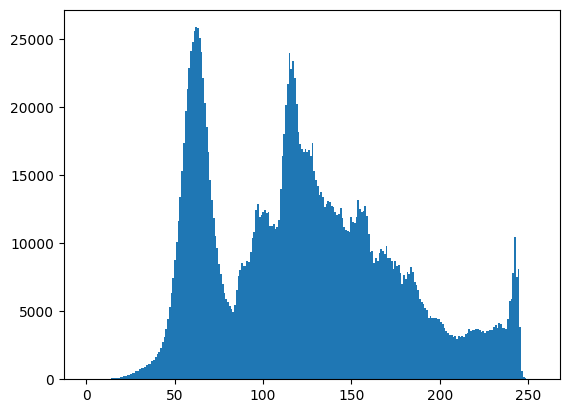

In [40]:

# raven flatten the image
plt.hist(img_bliss.ravel(), 256, [0, 255])
plt.show()


Or you can use normal plot of matplotlib, which would be good for BGR plot. For that, you need to find the histogram data first. Try below code:

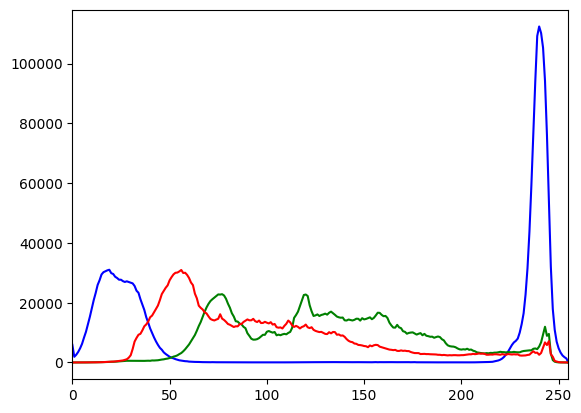

In [41]:
# Load the color image at 'imgKarlMax_path'
img_color_bliss = cv.imread(img_bliss_path)

# Define color channels for plotting ('b' for blue, 'g' for green, and 'r' for red)
color = ('b', 'g', 'r')

# Iterate over each color channel (blue, green, red) to calculate and plot its histogram
for i, col in enumerate(color):
    histr = cv.calcHist([img_color_bliss], [i], None, [256], [0, 255])  # Calculate histogram for each color channel
    plt.plot(histr, color=col)  # Plot histogram for the current color channel
    plt.xlim([0, 255])  # Set the x-axis range for pixel intensities

# Display the histograms of all three color channels
plt.show()


In [42]:
!git remote set-url origin git@github.com:Likelipop/See_image_processing.git

In [43]:
!git add --all
!git commit -a -m "half ways"
!git push origin main

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@11cce393d59a.(none)')
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [44]:
!!git config --global user.name "Likelipop"

[]

# Histogram Equalization

Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does (in simple words). This normally improves the contrast of the image.

## Histogram Equalization in Numpy

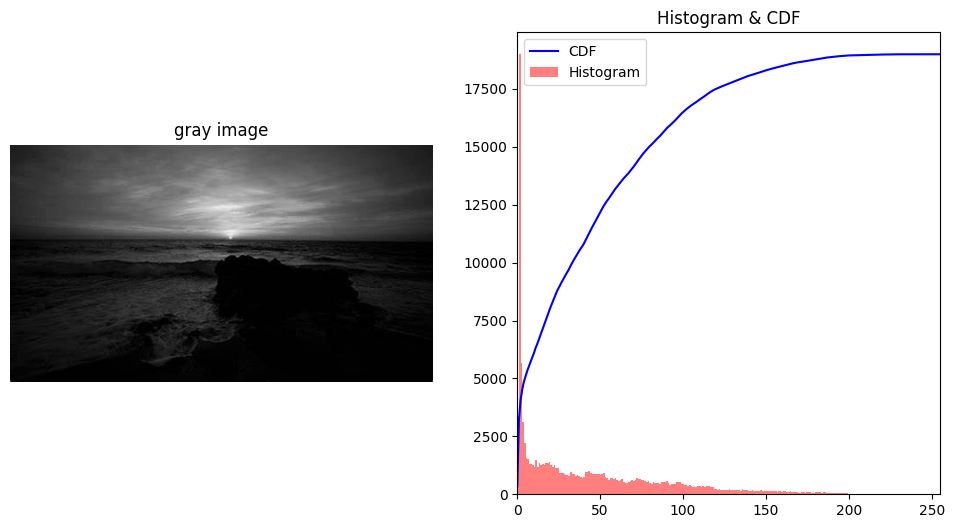

In [45]:
# Load the grayscale image
img_path = '/content/See_image_processing/Lab_02/Images/Sea.jpg'
img_sea = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

# Calculate the histogram and cumulative distribution function (CDF)
hist, bins = np.histogram(img_sea.flatten(),256, [0,255])


# Compute cumulative sum to obtain the CDF
cdf = hist.cumsum()
# Normalize CDF for visualization (*)
cdf_normalized = cdf*float(hist.max())/cdf.max()


# Set up the plot figure with a specified size
plt.figure(figsize=(12, 6))

# Plot the grayscale image show -> title -> turn off the axis
plt.subplot(1,2,1)
plt.imshow(img_sea, cmap= 'gray')
plt.title ('gray image')
plt.axis('off')


# Plot the histogram and normalized CDF plot hist
plt.subplot(1, 2, 2)
plt.plot(cdf_normalized, color='b')  # Plot CDF in blue
plt.hist(img_sea.flatten(), 256, [0, 255], color='r', alpha=0.5)  # Plot histogram in red with some transparency
plt.xlim([0, 255])  # Set x-axis range for pixel intensities
plt.legend(('CDF', 'Histogram'), loc='upper left')  # Add a legend
plt.title("Histogram & CDF")  # Set title

# Display the plots
plt.show()




<class 'numpy.ndarray'>


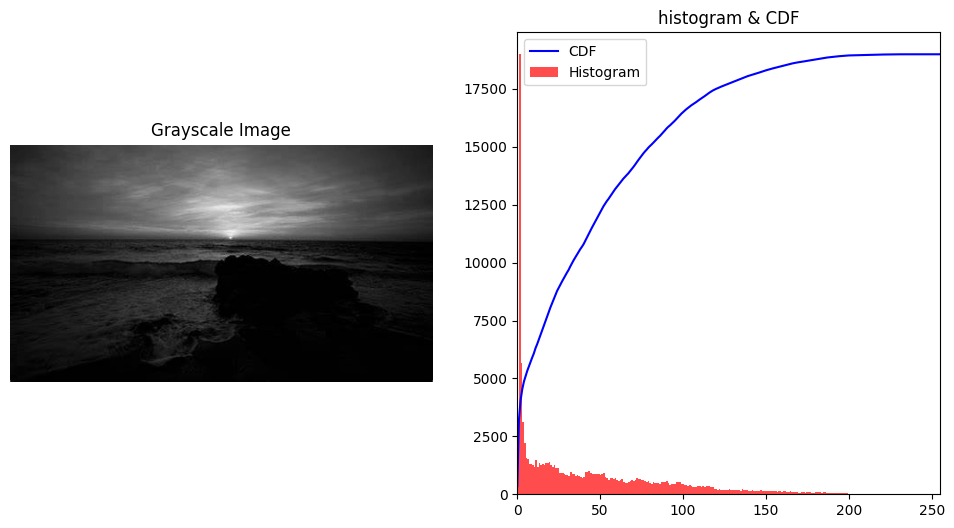

In [46]:
# Load the grayscale image
sea_path = '/content/See_image_processing/Lab_02/Images/Sea.jpg'
img_sea = cv.imread(sea_path, cv.IMREAD_GRAYSCALE)

# Calculate the histogram and cumulative distribution function (CDF)
hist, bins = np.histogram(img_sea.flatten(),256, [0,255])
olf_cdf=cdf = hist.cumsum()  # Compute cumulative sum to obtain the CDF

print(type(cdf))
cdf_normalized = cdf * float(hist.max()) / cdf.max()  # Normalize CDF for visualization

# Set up the plot figure with a specified size
plt.figure(figsize=(12, 6))

# Plot the grayscale image
plt.subplot(1, 2, 1)
plt.imshow(img_sea, cmap='gray')  # Display image in grayscale
plt.title("Grayscale Image")  # Set title
plt.axis('off')  # Hide axes

plt.subplot(1,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist (img_sea.flatten(), 256, [0,255],color ='r', alpha = 0.7)
plt.xlim([0,255])
plt.legend(('CDF','Histogram'), loc = 'upper left')
plt.title("histogram & CDF")
# Display the plots
plt.show()


You can see histogram lies in darker region. We need the full spectrum. For that, we need a transformation function which maps the input pixels in **brighter region** to output pixels in **full region**. That is what histogram equalization does.

Now we find the minimum histogram value (excluding 0) and apply the histogram equalization equation as given in wiki page. But I have used here, the masked array concept array from Numpy. For masked array, all operations are performed on non-masked elements. You can read more about it from Numpy docs on masked arrays.

In [47]:
# Mask all zero values in the CDF to avoid issues with division by zero
cdf_m = np.ma.masked_equal(cdf, 0)

# Normalize the CDF values to fit the range [0, 255]
# Subtract the minimum CDF value, multiply by 255, then divide by the range of CDF values (max - min)
cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max() - cdf_m.min())
# Replace masked elements (previously 0 in the original CDF) with 0, and cast to uint8 for image compatibility

cdf = np.ma.filled(cdf_m,0).astype('uint8')


Now we have the look-up table that gives us the information on what is the output pixel value for every input pixel value. So we just apply the transform.



In [48]:
img2_sea = cdf[img_sea]  # Apply the histogram equalization transform to the grayscale image

Now we calculate its histogram and cdf as before and result looks like below :



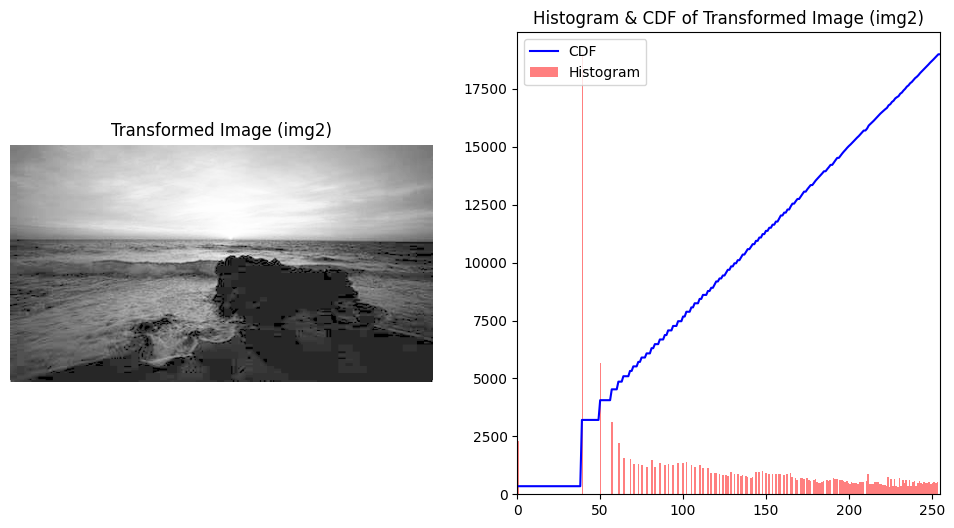

In [49]:
# Calculate the histogram and cumulative distribution function (CDF) of img2
hist, bins = np.histogram(img2_sea.flatten(), 256, [0, 255])  # Compute histogram with 256 bins over range [0, 255]
cdf = hist.cumsum()  # Compute cumulative sum to get the CDF
cdf_normalized = cdf * float(hist.max()) / cdf.max()  # Normalize the CDF for visualization

# Set up the plot figure with a specified size
plt.figure(figsize=(12, 6))

# Display img2 as a grayscale image
plt.subplot(1, 2, 1)
plt.imshow(img2_sea, cmap='gray')  # Display the transformed image in grayscale
plt.title("Transformed Image (img2)")  # Set title
plt.axis('off')  # Hide axes

# Display the histogram and normalized CDF of img2
plt.subplot(1, 2, 2)
plt.plot(cdf_normalized, color='b')  # Plot normalized CDF in blue
plt.hist(img2_sea.flatten(), 256, [0, 255], color='r', alpha=0.5)  # Plot histogram in red with some transparency
plt.xlim([0, 255])  # Set x-axis range for pixel intensities
plt.legend(('CDF', 'Histogram'), loc='upper left')  # Add a legend for clarity
plt.title("Histogram & CDF of Transformed Image (img2)")  # Set title

# Show the plots
plt.show()


In [50]:
cv.imwrite('sea1.png',img_sea)
cv.imwrite('sea2.png',img2_sea)

True

In [51]:
# just for distinguishing
new_cdf = cdf


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

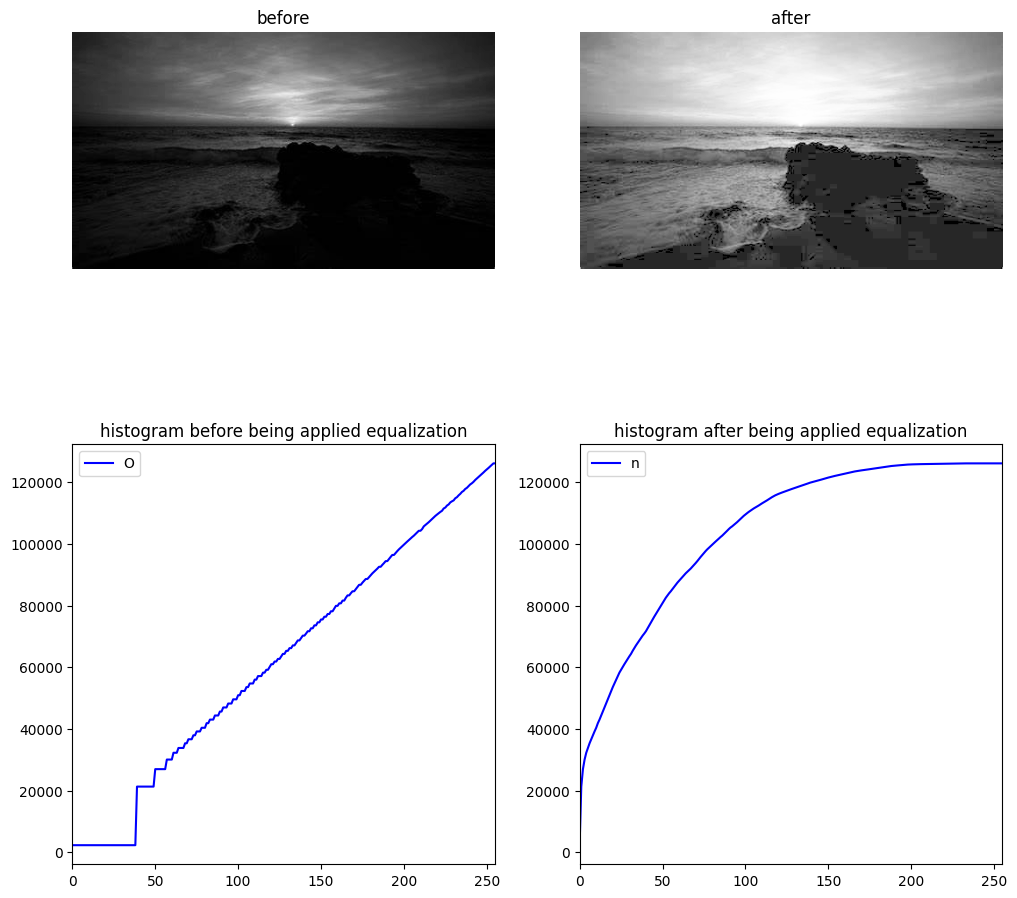

In [30]:
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
plt.imshow(img_sea, cmap = 'gray')
plt.title('before')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img2_sea,cmap = 'gray')
plt.title('after')
plt.axis('off')

plt.subplot(2,2,3)
plt.plot(old_cdf, color = 'b')
plt.xlim([0,255])
plt.title("histogram before being applied equalization")
plt.legend("Old CDF")


plt.subplot(2,2,4)
plt.plot(cdf, color = 'b')
plt.xlim([0,255])
plt.title("histogram after being applied equalization")
plt.legend("new CDF")
plt


After being apllied "histogram equalization", the picture turn out to be more "neutral" (the old ones was a bit darker - the histogram was mostly distributed at the smaller intensity range)  

## Histograms Equalization in OpenCV

OpenCV has a function to do this, cv.equalizeHist(). Its input is just grayscale image and output is our histogram equalized image.

Below is a simple code snippet showing its usage for same image we used

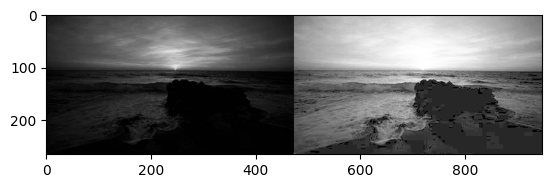

In [25]:
# Load the grayscale image from 'imgKarlMax_path'
#img_sea = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
img_sea2 = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

# Apply histogram equalization to the grayscale image
equa_img_sea2 = cv.equalizeHist(img_sea)

# Stack the original and equalized images side-by-side for comparison
res=np.hstack((img_sea2, equa_img_sea2))

# Save the resulting stacked image as 'imgKarlMax_res.png'

cv.imwrite('image_equalization.png', res)

plt.imshow(res, cmap = "gray")
plt.show()


# **Application of Mask**

We used cv.calcHist() to find the histogram of the full image. What if you want to find histograms of some regions of an image? Just create a mask image with white color on the region you want to find histogram and black otherwise. Then pass this as the mask.

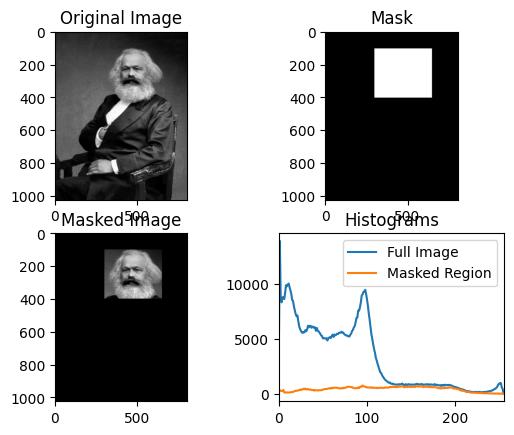

In [ ]:
# Load the grayscale image from 'imgKarlMax_path'
img = cv.imread(imgKarlMax_path, cv.IMREAD_GRAYSCALE)

# Verify that the image has been loaded successfully; if not, raise an error message
assert img is not None, "File could not be read; check with os.path.exists()"

# Create a mask with the same dimensions as the image, initialized to 0 (black)
mask = np.zeros(img.shape[:2], np.uint8)

# Define a rectangular region in the mask (from row 100 to 400, and column 300 to 650) and set it to 255 (white)
mask[100:400, 300:650] = 255

# Apply the mask to the image using a bitwise AND operation
masked_img = cv.bitwise_and(img, img, mask=mask)

# Calculate histogram of the full image (no mask) and the masked region only
hist_full = cv.calcHist([img], [0], None, [256], [0, 255])  # Histogram of full image
hist_mask = cv.calcHist([img], [0], mask, [256], [0, 255])  # Histogram of masked region only

# Set up subplots to display the images and histograms
plt.subplot(221), plt.imshow(img, 'gray')  # Original image
plt.title("Original Image")

plt.subplot(222), plt.imshow(mask, 'gray')  # Display the mask
plt.title("Mask")

plt.subplot(223), plt.imshow(masked_img, 'gray')  # Display the masked image
plt.title("Masked Image")

# Display histograms: full image histogram and masked region histogram
plt.subplot(224), plt.plot(hist_full, label='Full Image'), plt.plot(hist_mask, label='Masked Region')
plt.xlim([0, 256])  # Set x-axis range for pixel intensities
plt.legend()  # Add a legend to distinguish between histograms
plt.title("Histograms")

# Display all subplots
plt.show()


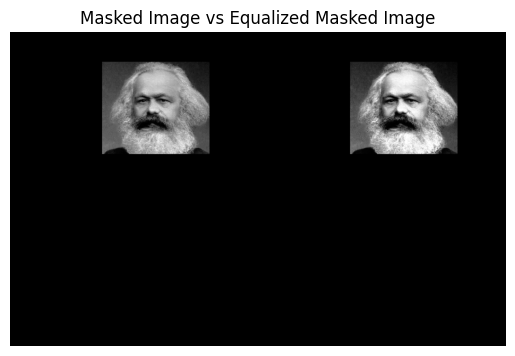

In [ ]:
# Apply histogram equalization to the masked image
equ = cv.equalizeHist(masked_img)

# Stack the original masked image and the equalized image side-by-side for comparison
res = np.hstack((masked_img, equ))  # Combine 'masked_img' and 'equ' horizontally

# Save the resulting stacked image as 'imgKarlMax_Maskres.png'
cv.imwrite('imgKarlMax_Maskres.png', res)

# Display the stacked image
plt.imshow(res, cmap="gray")  # Show the combined image in grayscale
plt.title("Masked Image vs Equalized Masked Image")  # Set title for clarity
plt.axis('off')  # Hide axes for a cleaner display

# Render the image
plt.show()


## CLAHE (Contrast Limited Adaptive Histogram Equalization)

The first histogram equalization we just saw, considers the global contrast of the image. In many cases, it is not a good idea. For example, below image shows an input image and its result after global histogram equalization.

It is true that the background contrast has improved after histogram equalization. But compare the face of statue in both images. We lost most of the information there due to over-brightness. It is because its histogram is not confined to a particular region as we saw in previous cases (Try to plot histogram of input image, you will get more intuition).



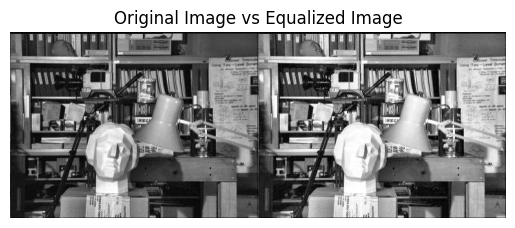

In [ ]:
# Load the grayscale image from 'imgTsukuba_l_path'
img = cv.imread(imgTsukuba_l_path, cv.IMREAD_GRAYSCALE)

# Verify that the image has been loaded successfully; if not, raise an error message
assert img is not None, "File could not be read; check with os.path.exists()"

# Apply histogram equalization to enhance contrast in the grayscale image
equ = cv.equalizeHist(img)

# Stack the original image and the equalized image side-by-side for comparison
res = np.hstack((img, equ))  # Combine the original image ('img') and the equalized image ('equ') horizontally

# Save the resulting stacked image as 'imgTsukuba_l_res.png'
cv.imwrite('imgTsukuba_l_res.png', res)

# Display the stacked image
plt.imshow(res, cmap="gray")  # Show the combined image in grayscale
plt.title("Original Image vs Equalized Image")  # Set title for clarity
plt.axis('off')  # Hide axes for a cleaner display

# Render the image
plt.show()


See the result and compare it with results above, especially the statue region



So to solve this problem, adaptive histogram equalization is used. In this, image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

Below code snippet shows how to apply CLAHE in OpenCV:

In [ ]:
# Load the grayscale image from 'imgTsukuba_l_path'
img = cv.imread(imgTsukuba_l_path, cv.IMREAD_GRAYSCALE)

# Verify that the image has been loaded successfully; if not, raise an error message
assert img is not None, "File could not be read; check with os.path.exists()"

# Create a CLAHE (Contrast Limited Adaptive Histogram Equalization) object
# clipLimit: sets the threshold for contrast limiting
# tileGridSize: defines the number of tiles in the grid (here, an 8x8 grid)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply the CLAHE to the grayscale image
cl1 = clahe.apply(img)

# Save the result of CLAHE applied image as 'clahe_2.jpg'
cv.imwrite('clahe_2.jpg', cl1)


True

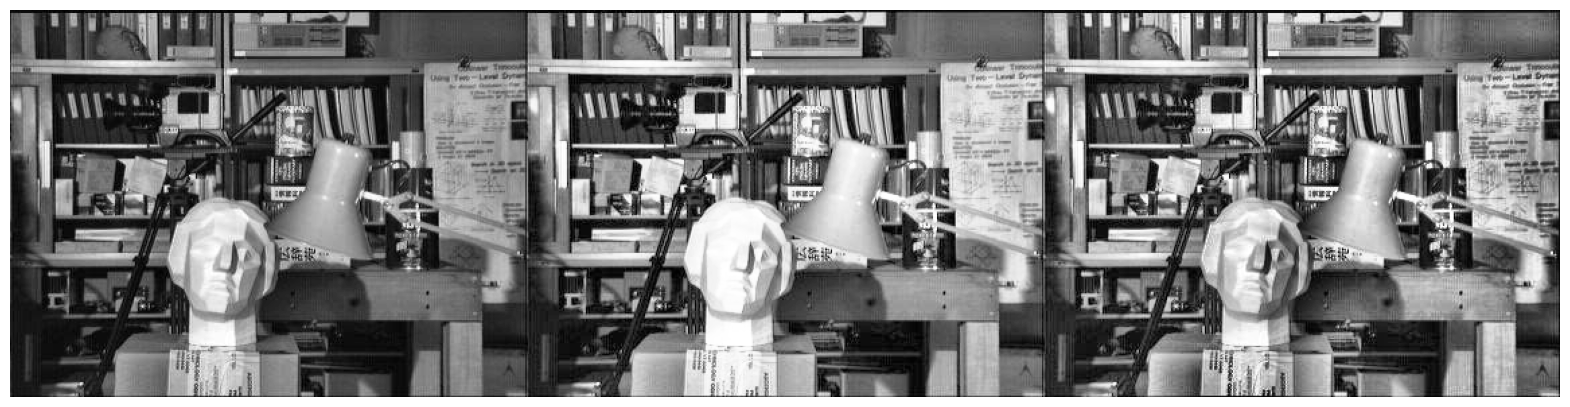

In [ ]:
# Stack the original image, the equalized image, and the CLAHE result side-by-side
res = np.hstack((img, equ, cl1))  # Combine 'img', 'equ', and 'cl1' horizontally

# Set the figure size for the display
plt.figure(figsize=(20, 20))  # Create a figure with a width and height of 20 inches

# Display the stacked image with a grayscale color map
plt.imshow(res, cmap="gray")  # Show the combined image in grayscale
plt.axis('off')  # Turn off axis ticks and labels for a cleaner look

# Render the image
plt.show()  # Display the figure with the stacked images


# **Exercise**


1. Choose an external image and fulfill all the requirements above.

2. Explain the concept of "BINS" and its role in creating an image histogram.

3. Why do we need to divide the histogram into "BINS"?

4. In the `cv.calcHist()` function, what do the `image`, `channel`, `mask`, `histSize`, and `range` parameters mean?

5. Based on the histogram of the image, what comments do you have about the image?

6. Draw a histogram of the image after equalization and compare it with the un-equalized image; what comments do you make?

7. Using your intuition when comparing the image after equalization with the original image, give your comments.